# TASK-2: 80 CEREALS

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### READING DATA

In [3]:
df = pd.read_csv("cognoriseDatasets\cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.shape

(77, 16)

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [7]:
cat_df = df.select_dtypes(include="object")
cat_df.agg(["unique","nunique"])

,name,mfr,type
unique,"[100% Bran, 100% Natural Bran, All-Bran, All-B...","[N, Q, K, R, G, P, A]","[C, H]"
nunique,77,7,2


**mfr: Manufacturer of cereal**
1. A = American Home Food Products;
2. G = General Mills
3. K = Kelloggs
4. N = Nabisco
5. P = Post
6. Q = Quaker Oats
7. R = Ralston Purina

**type:**
1. cold
2. hot

In [8]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

#### DISTRIBUTION OF MANUFACTURER AND TYPE OF CEREAL

<Axes: xlabel='type', ylabel='count'>

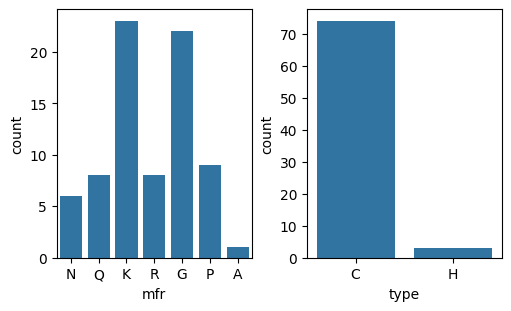

In [9]:
fig,axs = plt.subplots(1,2,figsize=(5,3),layout="constrained")
sns.countplot(data=df,x="mfr",ax=axs[0])
sns.countplot(data=df,x="type",ax=axs[1])

#### MINIMUM, MAXIMUM, AVERAGE RATINGS FOR GIVEN DATA

In [10]:
df["rating"].agg(["min","max","mean"])

min     18.042851
max     93.704912
mean    42.665705
Name: rating, dtype: float64

#### RATING ABOVE 50

In [11]:
high_rating_df = df[df["rating"]>=50]
high_rating_num_df = high_rating_df.select_dtypes(include=["float","int"])
high_rating_num_df.pop("rating")
agg = high_rating_num_df.agg(["mean","max","min"])
agg

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
mean,87.619048,3.285714,0.428571,96.904762,3.604762,13.857143,2.52381,122.809524,16.666667,2.142857,0.944286,0.786667
max,110.000000,6.000000,2.000000,290.000000,14.000000,21.000000,7.00000,330.000000,25.000000,3.000000,1.000000,1.250000
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,1.000000,0.500000,0.250000


#### DISTRIBUTION OF RATING

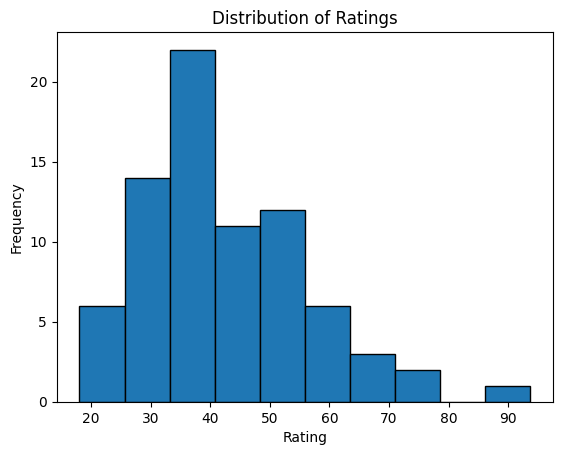

In [12]:
plt.hist(df['rating'],edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
df[["fat","protein","vitamins","shelf"]].agg(["nunique","unique"])

,fat,protein,vitamins,shelf
nunique,5,6,3,3
unique,"[1, 5, 0, 2, 3]","[4, 3, 2, 1, 6, 5]","[25, 0, 100]","[3, 1, 2]"


#### AVERAGE RATING FOR GRAMS OF FAT

In [14]:
df.groupby("fat")["rating"].mean().sort_values(ascending=False)

fat
0    51.778261
1    38.855205
2    36.446123
3    35.472138
5    33.983679
Name: rating, dtype: float64

#### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO FAT

<Axes: xlabel='fat', ylabel='fiber'>

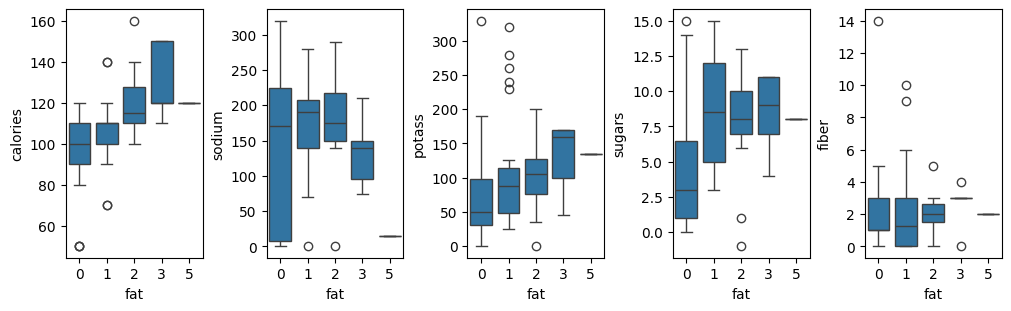

In [41]:
fig,axs=plt.subplots(1,5,figsize=(10,3),layout="constrained")
sns.boxplot(data=df,x="fat",y="calories",ax=axs[0])
sns.boxplot(data=df,x="fat",y="sodium",ax=axs[1])
sns.boxplot(data=df,x="fat",y="potass",ax=axs[2])
sns.boxplot(data=df,x="fat",y="sugars",ax=axs[3])
sns.boxplot(data=df,x="fat",y="fiber",ax=axs[4])

#### AVERAGE RATING FOR GRAMS OF PROTEIN

In [16]:
df.groupby("protein")["rating"].mean().sort_values(ascending=False)

protein
4    55.312610
6    51.948161
5    50.828392
3    45.432570
2    41.310069
1    29.474616
Name: rating, dtype: float64

#### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO PROTEIN

<Axes: xlabel='protein', ylabel='fiber'>

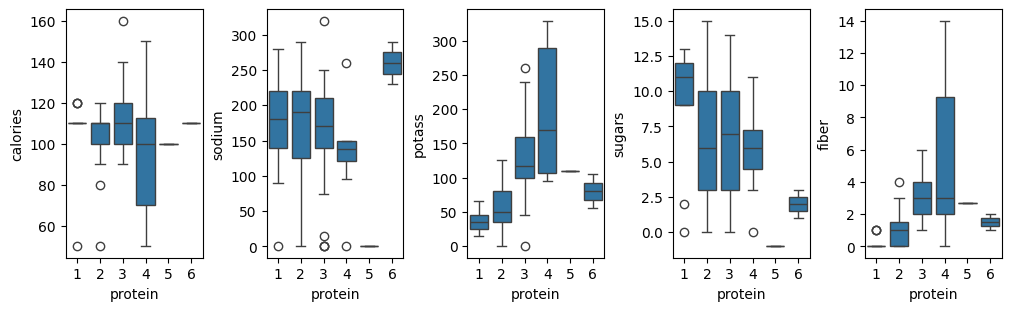

In [44]:
fig,axs=plt.subplots(1,5,figsize=(10,3),layout="constrained")
sns.boxplot(data=df,x="protein",y="calories",ax=axs[0])
sns.boxplot(data=df,x="protein",y="sodium",ax=axs[1])
sns.boxplot(data=df,x="protein",y="potass",ax=axs[2])
sns.boxplot(data=df,x="protein",y="sugars",ax=axs[3])
sns.boxplot(data=df,x="protein",y="fiber",ax=axs[4])

#### AVERAGE RATING CONSIDERING VITAMINS

In [18]:
df.groupby("vitamins")["rating"].mean().sort_values(ascending=False)

vitamins
0      61.077283
25     40.762713
100    38.098352
Name: rating, dtype: float64

#### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO VITAMINS

<Axes: xlabel='vitamins', ylabel='fiber'>

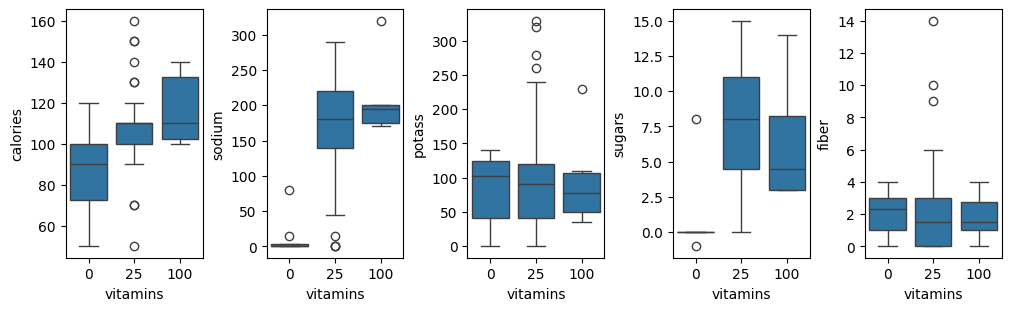

In [39]:
fig,axs=plt.subplots(1,5,figsize=(10,3),layout="constrained")
sns.boxplot(data=df,x="vitamins",y="calories",ax=axs[0])
sns.boxplot(data=df,x="vitamins",y="sodium",ax=axs[1])
sns.boxplot(data=df,x="vitamins",y="potass",ax=axs[2])
sns.boxplot(data=df,x="vitamins",y="sugars",ax=axs[3])
sns.boxplot(data=df,x="vitamins",y="fiber",ax=axs[4])

#### AVERAGE RATING OF SHELF

In [20]:
df.groupby("shelf")["rating"].mean().sort_values(ascending=False)

shelf
1    46.145439
3    45.220032
2    34.972827
Name: rating, dtype: float64

#### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO SHELF

<Axes: xlabel='shelf', ylabel='fiber'>

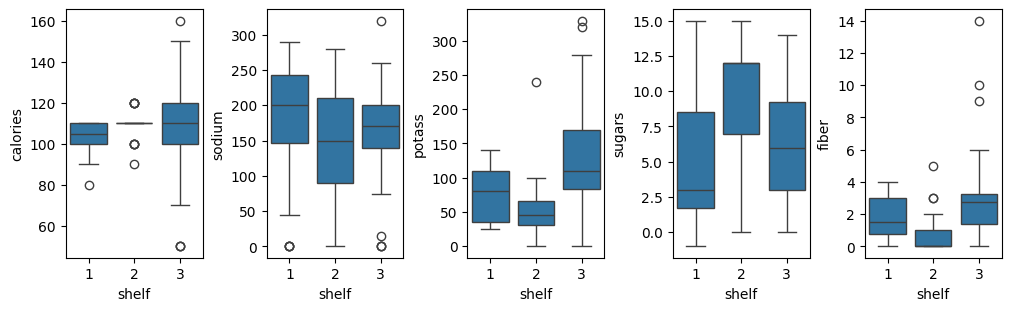

In [38]:
fig,axs=plt.subplots(1,5,figsize=(10,3),layout="constrained")
sns.boxplot(data=df,x="shelf",y="calories",ax=axs[0])
sns.boxplot(data=df,x="shelf",y="sodium",ax=axs[1])
sns.boxplot(data=df,x="shelf",y="potass",ax=axs[2])
sns.boxplot(data=df,x="shelf",y="sugars",ax=axs[3])
sns.boxplot(data=df,x="shelf",y="fiber",ax=axs[4])

#### DISTRIBUTION OF MFR OVER TYPE

<Axes: xlabel='mfr', ylabel='count'>

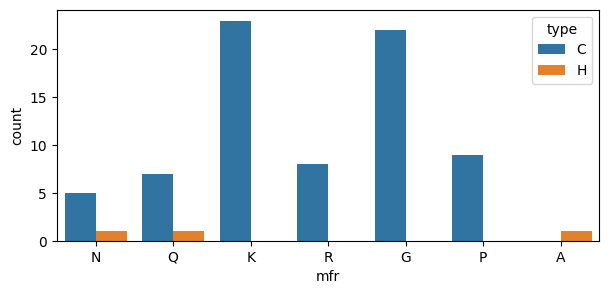

In [53]:
fig = plt.figure(figsize=(7,3))
sns.countplot(data=df,x="mfr",hue="type")

#### PROPORTIONAL CHART FOR MAUFACTURER AND TYPE

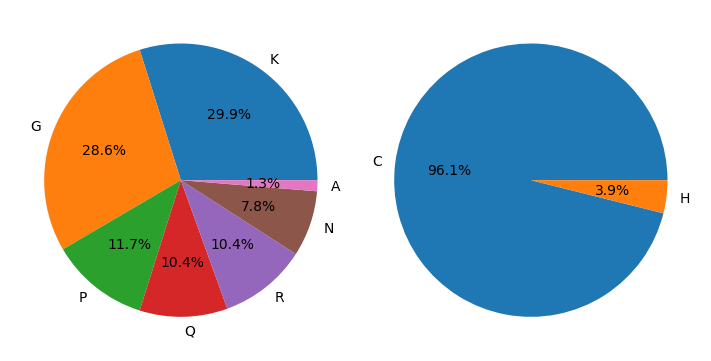

In [24]:
fig,axs=plt.subplots(1,2,figsize=(7,9),layout="constrained")
p=df["mfr"].value_counts(normalize=True)
axs[0].pie(p.values,labels=p.index,autopct="%1.1f%%")
q=df["type"].value_counts(normalize=True)
axs[1].pie(q.values,labels=q.index,autopct="%1.1f%%")
plt.show()

#### RELATION BETWEEN RATING AND SODIUM, FIBER, POTASSIUM

<Axes: xlabel='rating', ylabel='potass'>

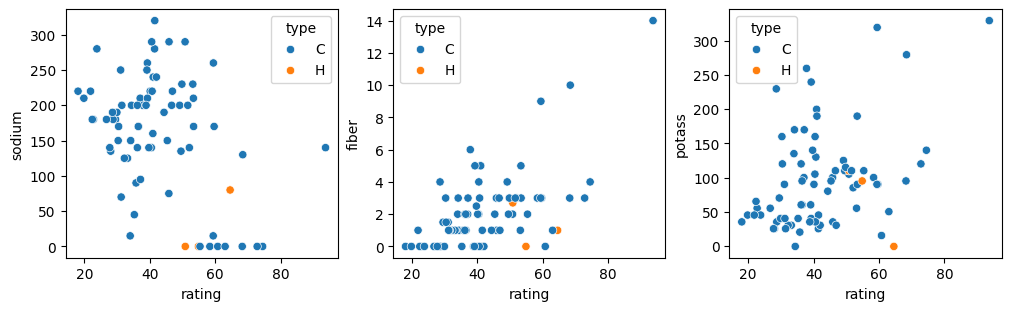

In [48]:
fig,axs=plt.subplots(1,3,figsize=(10,3),layout="constrained")
sns.scatterplot(data=df,y="sodium",x="rating",hue="type",ax=axs[0])
sns.scatterplot(data=df,y="fiber",x="rating",hue="type",ax=axs[1])
sns.scatterplot(data=df,x="rating",y="potass",hue="type",ax=axs[2])

#### RATING VS NUTRIENTS

<Axes: xlabel='vitamins', ylabel='rating'>

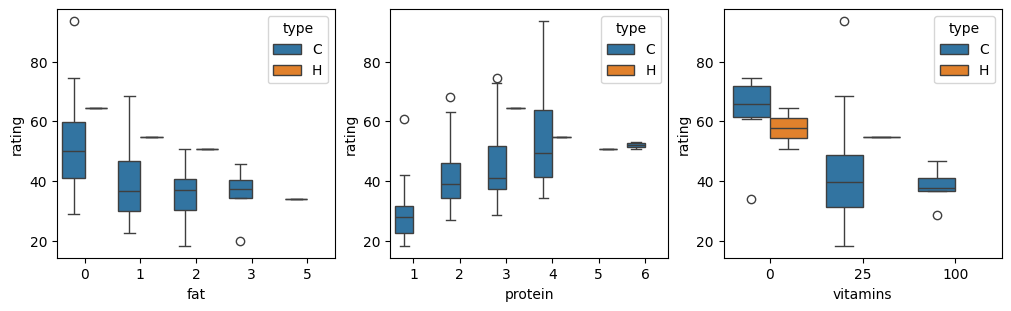

In [60]:
fig,axs=plt.subplots(1,3,figsize=(10,3),layout="constrained")
sns.boxplot(data=df,x="fat",y="rating",hue="type",ax=axs[0])
sns.boxplot(data=df,x="protein",y="rating",hue="type",ax=axs[1])
sns.boxplot(data=df,y="rating",x="vitamins",hue="type",ax=axs[2])

#### HISTPLOT FOR WEIGHT AND CUPS

<Axes: xlabel='cups', ylabel='Count'>

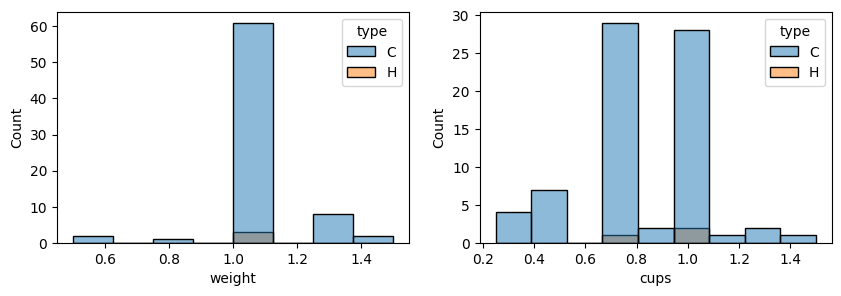

In [73]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data=df, x="weight",hue="type",ax=axs[0])
sns.histplot(data=df, x="cups", hue="type",ax=axs[1])